In [4]:

import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pickle

style.use("ggplot")

data = pd.read_csv("student-mat.csv", sep=";")

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:

predict = "G3"


data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) 


x = np.array(data.drop([predict],axis= 1))

y =np.array(data[predict]) 


<Axes: >

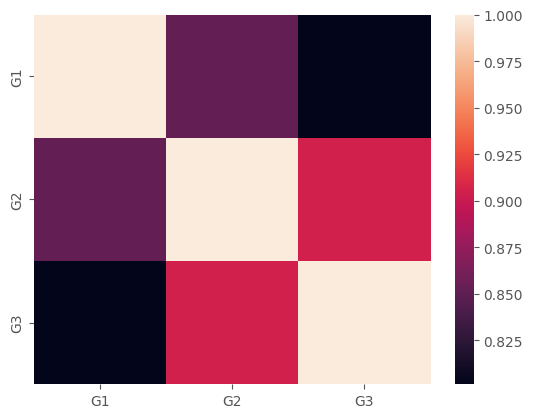

In [9]:

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)



x_df = data.drop([predict],axis= 1)
y_df = data[predict]
df_num = data[['G1','G2',"G3"]]
df_cat = data[["absences","failures", "studytime"]]
sns.heatmap(df_num.corr())

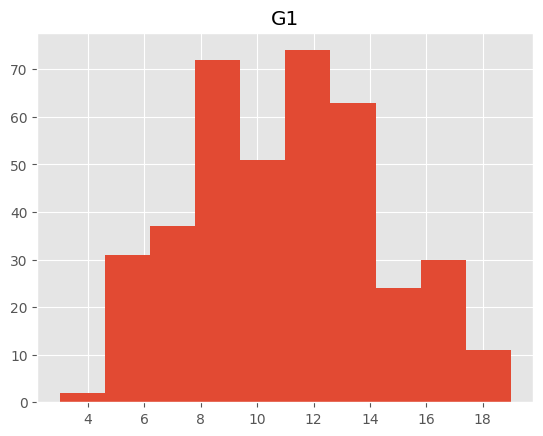

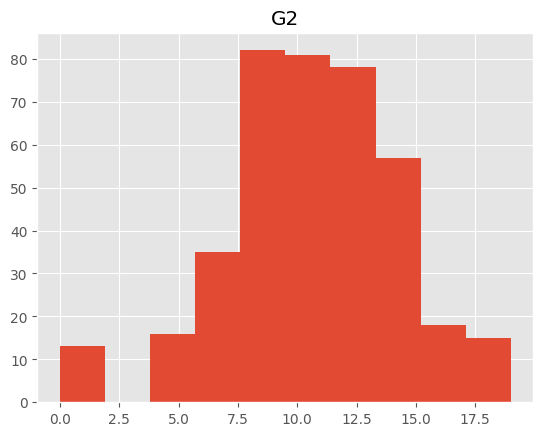

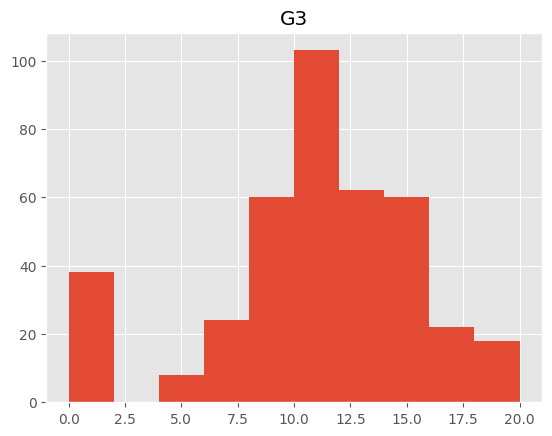

In [10]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

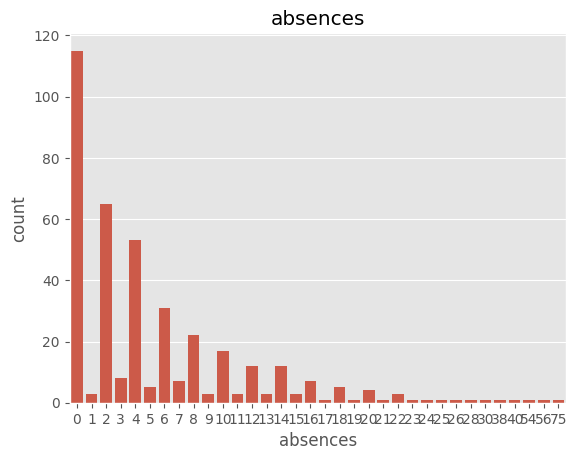

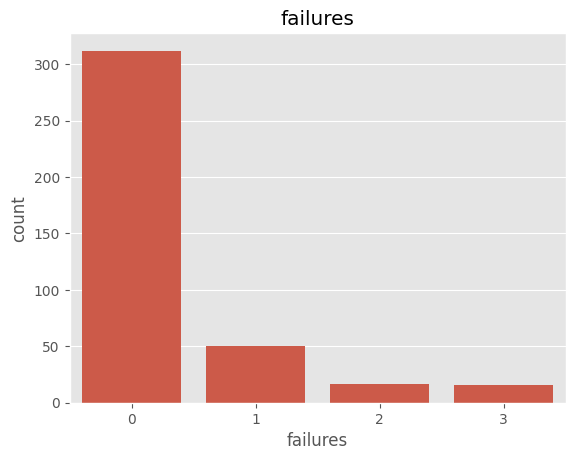

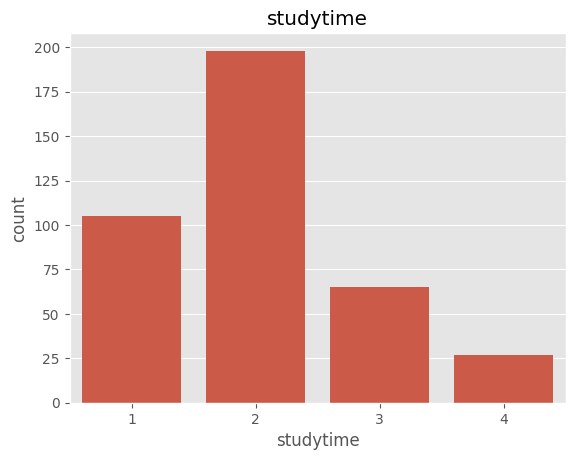

In [12]:

for i in df_cat.columns:
    sns.countplot(x=df_cat[i], data=df_cat).set_title(i)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.8341575061655238
Accuracy: 0.7257192409739686
Accuracy: 0.8104230898440988
Accuracy: 0.8255473747936675
Accuracy: 0.9387512128842284
Accuracy: 0.7118207531820497
Accuracy: 0.6702563160046352
Accuracy: 0.738966687719255
Accuracy: 0.8740355808385325
Accuracy: 0.8206284882328294
Accuracy: 0.7249221086120603
Accuracy: 0.7415754373169456
Accuracy: 0.7852767231014817
Accuracy: 0.8504762776515631
Accuracy: 0.9090072045122328
Accuracy: 0.7985097769534761
Accuracy: 0.7318239514579539
Accuracy: 0.8708846433668356
Accuracy: 0.8958081324415543
Accuracy: 0.831203903357849
______________________________________

Coefficients / Slopes in 5D-Space:  [ 0.14608277  0.99008694  0.03779064 -0.33749736 -0.22165856]
Intercept:  -1.4808488374477715
______________________________________

Predicted Final Grade - Input Data - Actual Final Grade
12.886454908865241 [14 13 12  1  3] 13
10.362207451199131 [10 11 10  0  4] 11
8.04206381800091 [ 9  9 11  2  2] 9
8.825345179023975 [9 9 8 0 1] 10
14.279449

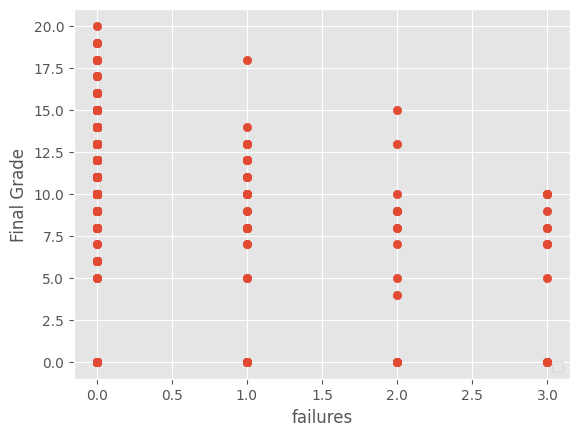

In [13]:

best = 0
for _ in range(20):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    
    linear = linear_model.LinearRegression()
 
    linear.fit(x_train, y_train)
   
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)


pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("______________________________________\n")
print('Coefficients / Slopes in 5D-Space: ', linear.coef_) 
print('Intercept: ', linear.intercept_)
print("______________________________________\n") 

predicted = linear.predict(x_test)


print("Predicted Final Grade - Input Data - Actual Final Grade")
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])



plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()



In [14]:

x = np.array(data.drop([predict], axis=1))

y =np.array(data[predict])

 
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3)


poly_features = polynomial_converter.fit_transform(x)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(poly_features, y, test_size=0.1)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


test_predictions = model.predict (x_test) 



In [16]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE) 

In [17]:
MAE

2.154689002037048

In [18]:
MSE

9.140822068764397

In [19]:
RMSE

3.0233792465988114

In [20]:
data['G3'].mean()

10.415189873417722

In [21]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student-mat.csv", sep=";")


df = df[["G1", "G2", "absences","failures", "studytime","G3"]]


X = df.drop(["G3"], axis=1)

y =df["G3"]


In [22]:

from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X.shape

(395, 5)

In [23]:

poly_features.shape

(395, 20)

In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1)


In [26]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([-0.86471437, -0.70029699, -0.45071257, -0.45777344,  1.16429041,
       -0.85776525, -0.81650935, -0.51120531, -0.4649714 ,  0.11619561,
       -0.82524302, -0.51955536, -0.44754518,  0.15170675, -0.23330287,
       -0.32972247, -0.30441758, -0.35386847, -0.44428143,  1.06476116])

In [27]:
poly_features[0]

array([ 5.,  6.,  6.,  0.,  2., 25., 30., 30.,  0., 10., 36., 36.,  0.,
       12., 36.,  0., 12.,  0.,  0.,  4.])

In [28]:


from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)


Ridge(alpha=1)

In [29]:
test_predictions = ridge_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [30]:
MAE

1.211345428042802

In [31]:
RMSE

1.6125592578278405

In [32]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')


In [33]:

ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [34]:

ridge_cv_model.alpha_

10.0

In [35]:
test_predictions = ridge_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [36]:
MAE

1.1984644820731032

In [37]:
RMSE

1.5987691591185116

In [38]:
ridge_cv_model.coef_

array([ 0.63145856,  2.23846857,  0.87589956, -0.9544318 , -0.59037754,
       -0.2704626 ,  0.16370208, -0.4653652 , -0.04032191,  0.18336976,
        1.01309666, -0.32377704,  0.22197377,  0.70552429, -0.66035188,
        0.25938952,  0.73996786,  0.57799026, -0.17922766, -0.37278043])